# Creative writing benchmark
Have you seen this benchmark somewhere. Do you want to reproduce and run it by youself.

In this lab, we will bechmark the creative writing capability of Nova, Claude and DeepSeek on Bedrock.

![create-writing-lechmazur](images/creative-lechmazur.png)

https://github.com/lechmazur/writing

# Prepare the data

We reuse the data from Lechmazure's github.

# Run the benchmark

```sh
export AWS_BEDROCK_REGION='us-west-2' 

cd creative-writing

promptfoo eval
```

# View the result in promptfoo

```sh
promptfoo view
```

![promptfoo-creative](images/promptfoo-creative.png)

# Draw the diagram

run the evaluation and save the result to json file.

```sh
promptfoo eval -output output.json
```

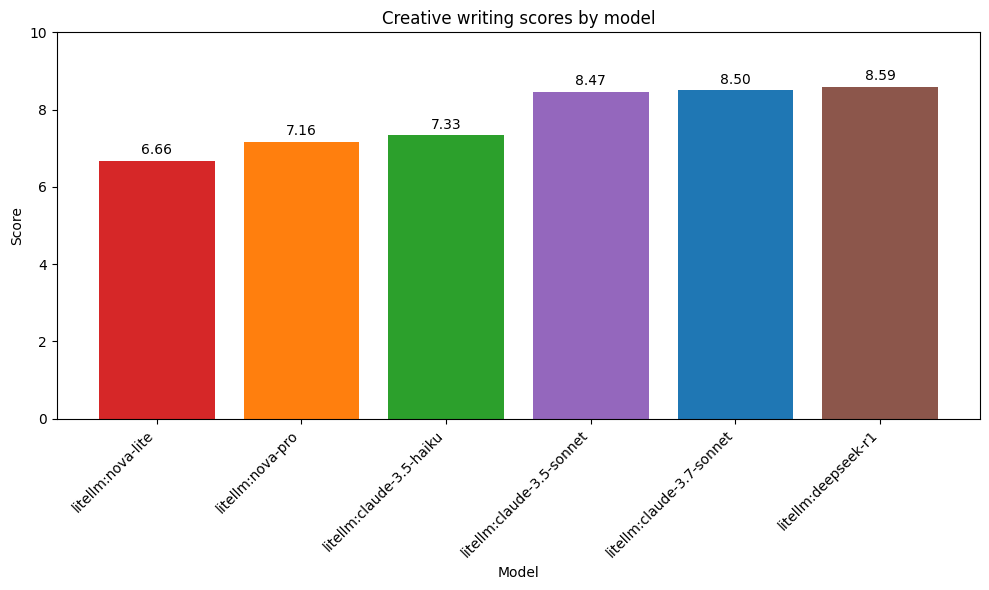

In [ ]:
import json
import matplotlib.pyplot as plt

with open('creative-writing/output.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

prompts = data["results"]["prompts"]

# Extract the model (provider) and score (divided by 20, hard-coded for 20 samples)
scores_data = []
for prompt in prompts:
    score = prompt["metrics"]["score"] / 10  # hard-coded for 10 samples
    model = prompt["provider"]
    scores_data.append((model, score))

# Sort by score (ascending order)
sorted_data = sorted(scores_data, key=lambda x: x[1])
sorted_models, sorted_scores = zip(*sorted_data)

# Create a color mapping for each unique model using a colormap
unique_models = list(set(sorted_models))
colormap = plt.get_cmap("tab10").colors
color_mapping = {model: colormap[i % len(colormap)] for i, model in enumerate(unique_models)}

# Assign color for each bar based on its model
bar_colors = [color_mapping[model] for model in sorted_models]

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_models, sorted_scores, color=bar_colors)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Creative writing scores by model")
plt.ylim(0, 10)
plt.xticks(rotation=45, ha="right")

# Annotate each bar with its score
for bar, score in zip(bars, sorted_scores):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.1,
        f"{score:.2f}",
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()